In [1]:
import pandas as pd

In [2]:
pop = pd.read_excel("world-data/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx",header=16)
pop.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2536431.018,2584034.227,2630861.69,...,7041194.168,7125827.957,7210582.041,7295290.759,7379796.967,7464021.934,7547858.9,7631091.113,7713468.205,7794798.729
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,814818.913,824003.512,833720.173,...,1239557.448,1244114.531,1248453.53,1252615.112,1256622.188,1260478.667,1264146.38,1267558.904,1270630.32,1273304.261
3,4,Estimates,Less developed regions,c,902,Development Group,1803,1721612.105,1760030.715,1797141.517,...,5801636.72,5881713.426,5962128.511,6042675.647,6123174.779,6203543.267,6283712.52,6363532.209,6442837.885,6521494.468
4,5,Estimates,Least developed countries,d,941,Development Group,902,195427.785,199180.385,203015.198,...,856471.437,876867.234,897793.439,919222.955,941131.317,963519.718,986385.402,1009691.252,1033388.868,1057438.163


In [3]:
pd.DataFrame(pop["Type"].unique())

,0
0,World
1,Label/Separator
2,Development Group
3,Special other
4,Income Group
5,Region
6,SDG region
7,Subregion
8,Country/Area
9,SDG subregion


In [4]:
world_pop = pop.loc[pop["Type"]=="World"]
world_pop.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,2536431.018,2584034.227,2630861.69,...,7041194.168,7125827.957,7210582.041,7295290.759,7379796.967,7464021.934,7547858.9,7631091.113,7713468.205,7794798.729


In [5]:
#del world_pop[world_pop.columns[0:2]]
world_pop = world_pop.drop(world_pop.iloc[:,0:7],axis=1).stack().reset_index()
world_pop.columns = ["dummy","year","population"]
del world_pop["dummy"]
world_pop

,year,population
0,1950,2536431.018
1,1951,2584034.227
2,1952,2630861.69
3,1953,2677609.061
4,1954,2724846.754
...,...,...
66,2016,7464021.934
67,2017,7547858.9
68,2018,7631091.113
69,2019,7713468.205


In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


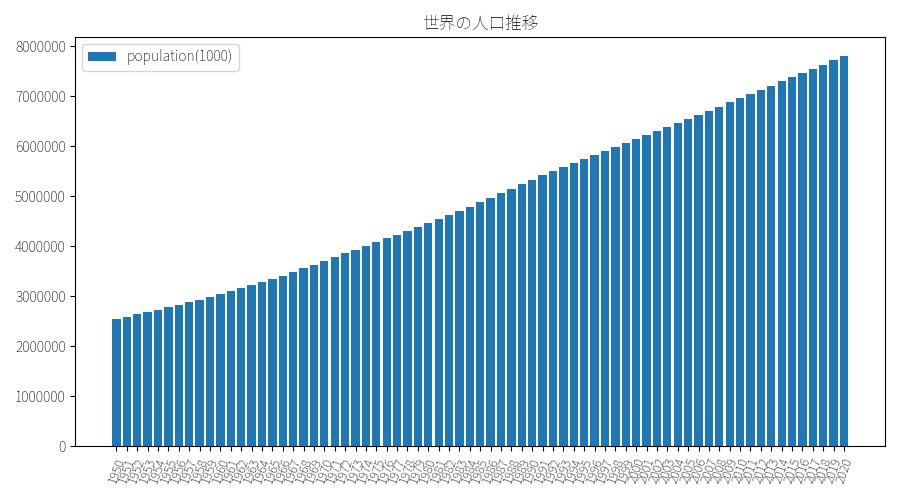

In [7]:
#plt.figure(figsize=(10,5))
#plt.plot(world_pop["year"],world_pop["population"],label="population(1000)")
#plt.xticks(rotation="90",fontsize=9)
#plt.legend()
fig, ax = plt.subplots(1,1,figsize=(9,5),tight_layout=True)
p_ax = ax
p_ax.set_title("世界の人口推移")
p_ax.bar(world_pop["year"],world_pop["population"],label="population(1000)")
p_ax.tick_params(axis="x",rotation=70, labelsize=9)
p_ax.legend()


## Region

In [8]:
region_pop = pop.loc[pop["Type"]=="Region"]
del region_pop["Index"]
del region_pop["Variant"]
del region_pop["Notes"]
del region_pop["Country code"]
del region_pop["Type"]
del region_pop["Parent code"]
region_pop = region_pop.rename(columns={region_pop.columns[0]:"Region"})
region_pop = region_pop.set_index(region_pop.columns[0])
region_pop.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Region,,,,,,,,,,,,,,,,,,,,,
Africa,227794.137,232327.857,237096.56,242092.456,247310.597,252748.917,258408.217,264292.214,270407.028,276760.722,...,1066409.712,1094343.029,1123045.137,1152433.618,1182438.803,1213040.542,1244222.269,1275921.014,1308064.176,1340598.113
Asia,1404908.992,1435819.067,1464833.757,1492894.964,1520767.943,1549041.914,1578122.023,1608237.026,1639460.782,1671747.88,...,4255189.624,4300462.191,4345331.317,4389699.496,4433475.322,4476607.792,4519040.016,4560667.137,4601371.266,4641054.786
Europe,549328.859,554324.506,559694.362,565281.964,570969.74,576678.764,582371.318,588048.223,593743.357,599513.229,...,737850.645,739225.166,740541.875,741818.28,743058.978,744268.79,745414.757,746419.436,747182.815,747636.045
Latin America and the Caribbean,168820.524,173280.491,177915.929,182708.882,187647.746,192727.225,197948.656,203319.926,208853.819,214566.099,...,597994.701,604599.457,611143.935,617596.481,623934.126,630144.544,636233.132,642216.709,648120.956,653962.332
Northern America,172602.611,175016.588,177778.5,180813.186,184051.533,187430.405,190892.803,194387.684,197870.177,201301.492,...,346251.161,349093.381,351824.035,354464.254,357031.045,359524.635,361942.247,364295.994,366600.944,368869.644


In [9]:
region_pop = region_pop.stack().reset_index()
region_pop.head()

,Region,level_1,0
0,Africa,1950,227794.137
1,Africa,1951,232327.857
2,Africa,1952,237096.56
3,Africa,1953,242092.456
4,Africa,1954,247310.597


In [10]:
region_pop.columns = ["Region","year","population"]
region_pop

,Region,year,population
0,Africa,1950,227794.137
1,Africa,1951,232327.857
2,Africa,1952,237096.56
3,Africa,1953,242092.456
4,Africa,1954,247310.597
...,...,...,...
421,Oceania,2016,40435.631
422,Oceania,2017,41006.479
423,Oceania,2018,41570.823
424,Oceania,2019,42128.048


<IPython.core.display.Javascript object>


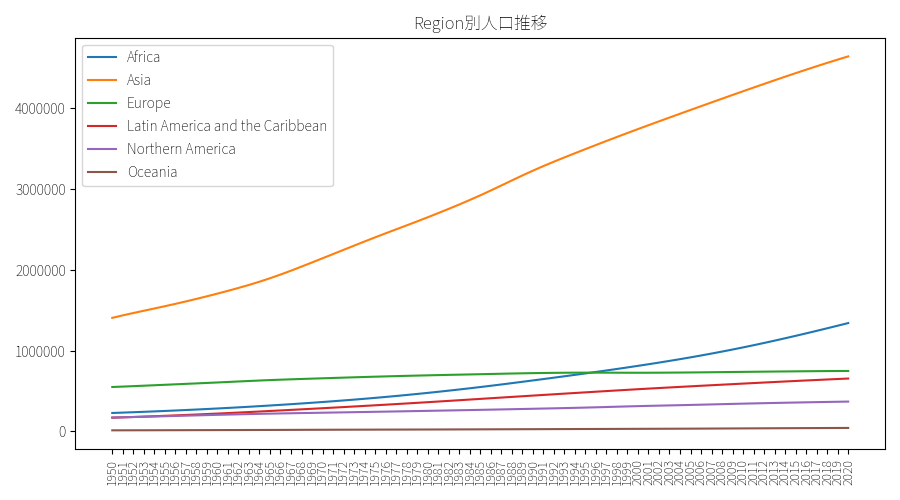

In [11]:
fig, ax = plt.subplots(1,1,figsize=(9,5),tight_layout=True)
p_ax = ax
p_ax.set_title("Region別人口推移")
years = region_pop["year"].unique()
for r in region_pop["Region"].unique():
    p_ax.plot(years,region_pop.loc[region_pop["Region"]==r]["population"],label=r)
p_ax.tick_params(axis="x",rotation=90, labelsize=9)
p_ax.legend()


In [12]:
region_pop_latest = region_pop.loc[region_pop["year"]==region_pop["year"].max()]
region_pop_latest = region_pop_latest.sort_values("population",ascending=False)

<IPython.core.display.Javascript object>


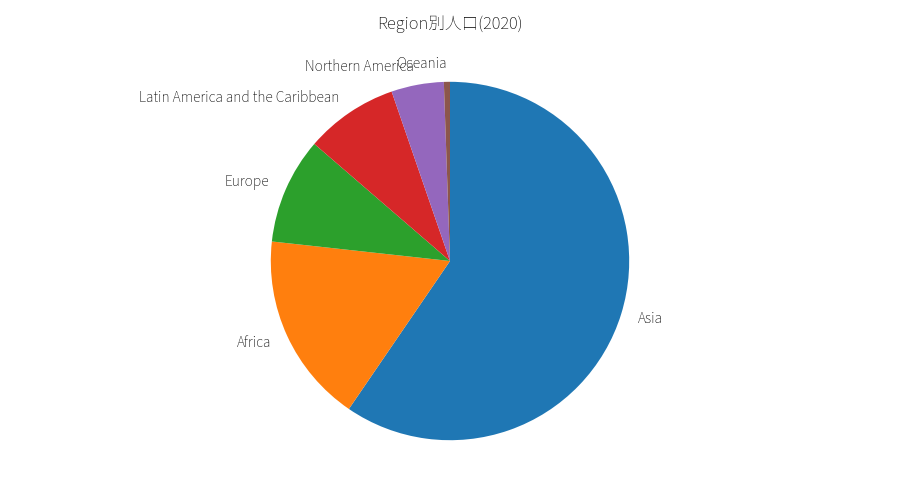

([<matplotlib.patches.Wedge at 0x7fb5f8c87b50>,
 [Text(1.050960862588005, -0.3247787944251852, 'Asia'),
  Text(-0.9993830176018668, -0.45960154931090785, 'Africa'),
  Text(-1.0085732988654357, 0.43906708008650874, 'Europe'),
  Text(-0.6168407249247599, 0.91077303433638, 'Latin America and the Caribbean'),
  Text(-0.20025343163814682, 1.0816184924071641, 'Northern America'),
  Text(-0.018919688613270823, 1.0998372813206403, 'Oceania')])

In [13]:
fig, ax = plt.subplots(1,1,figsize=(9,5),tight_layout=True)
p_ax = ax
p_ax.set_title("Region別人口({})".format(region_pop_latest["year"].max()))
p_ax.pie(region_pop_latest["population"],labels=region_pop_latest["Region"],startangle=90,counterclock=False)


In [14]:
c_pop_latest = pop.loc[pop["Type"]=="Country/Area"][["Country code","Region, subregion, country or area *",pop.columns[-1]]]
c_pop_latest.columns = ["code","country","population"]

In [15]:
c_pop_latest.sort_values("population",ascending=False).head(10)

,code,country,population
127,156,China,1439323.774
119,356,India,1380004.385
288,840,United States of America,331002.647
138,360,Indonesia,273523.621
123,586,Pakistan,220892.331
189,76,Brazil,212559.409
75,566,Nigeria,206139.587
117,50,Bangladesh,164689.383
239,643,Russian Federation,145934.46
183,484,Mexico,128932.753
